<a href="https://colab.research.google.com/github/minaborhani1/Titanic-EDA-and-ML/blob/main/Project_1_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis - Titanic Dataset**
EDA and ML

In this section, we aim to explore and understand the **key patterns**, **relationships**, and **structure** of the **Titanic dataset**. The goal of EDA is to identify important features, detect missing values, and recognize **potential correlations** that may **influence survival rates**.

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df = pd.read_csv('Titanic-Dataset.csv')

In [144]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Description**
The Titanic dataset contains information on the passengers of the RMS Titanic, which sank in 1912. Each row represents a passenger, and each column provides specific details about them. Below is a description of each column in the dataset:

*   **PassengerId:** A unique identifier assigned to each passenger
*   **Survived:** Indicates if the passenger survived (1) or did not survive (0). This is the target variable for our analysis.

*   **Pclass:** The class in which the passenger was traveling (1st, 2nd, or 3rd class). This is a proxy for socioeconomic status.
*   **Name:** The full name of the passenger.
*   **Sex:** The gender of the passenger (male or female).
*   **Age:** The age of the passenger. Some values are missing and will need to be handled during data preprocessing.

*   **SibSp:** The number of siblings or spouses traveling with the passenger.
*   **Parch:** The number of parents or children traveling with the passenger.
*   **Fare:** The amount of money the passenger paid for the ticket.
*   **Cabin:** The cabin number assigned to the passenger. Many values are missing in this column.
*   **Embarked:** The port of embarkation, indicating where the passenger boarded the ship (C = Cherbourg, Q = Queenstown, S = Southampton).


In [145]:
# Check for missing values in each column of the dataset
missing_values = df.isnull().sum()

# Display the number of missing values in each column
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


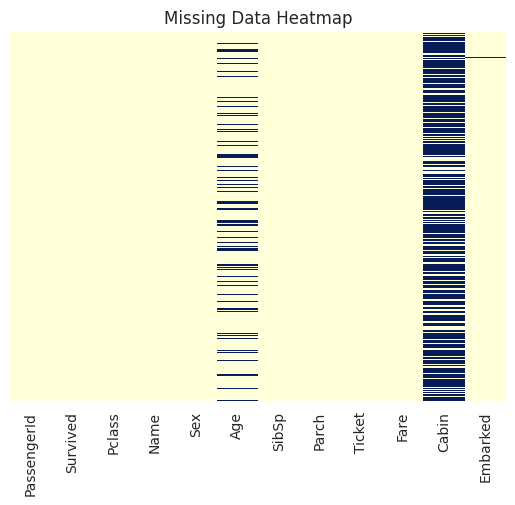

In [146]:
# Creating a heatmap to visualize missing values in the Titanic dataset
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='YlGnBu')
plt.title("Missing Data Heatmap")
plt.show()

*   **Age:** Many missing values, likely due to passengers not providing this information
*   **Cabin:** A large number of missing values, possibly due to passengers without assigned cabins or unavailable data.
*   **Embarked:** Few missing values, easy to handle.

The next steps will involve **imputing or dropping missing values** as appropriate to ensure a clean dataset for analysis.

In [147]:
# Displaying information about the Titanic dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the df.info() output, we can see that columns **'Sex' and 'Embarked'** are categorical and need to be converted to numeric values for machine learning. We'll use **one-hot encoding** for **categorical** columns like 'Sex' and 'Embarked'

# **Data Visualisation**

<Axes: xlabel='Survived', ylabel='count'>

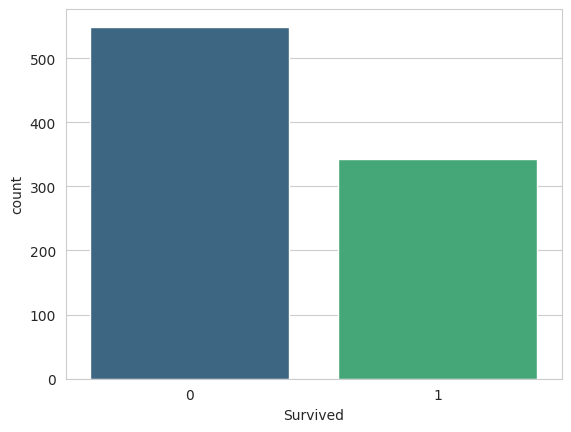

In [148]:
# Create a countplot to visualize the distribution of survival status
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Survived', palette='viridis',legend=False)

The count plot reveals the distribution of passengers who survived versus those who did not. From the visualization, we can see that most passengers did not survive the Titanic disaster. The bar for passengers who did not survive (labeled '0') is significantly taller than the one for passengers who survived (labeled '1'). This indicates an unequal survival rate, with a higher number of fatalities compared to survivors.

<Axes: xlabel='Survived', ylabel='count'>

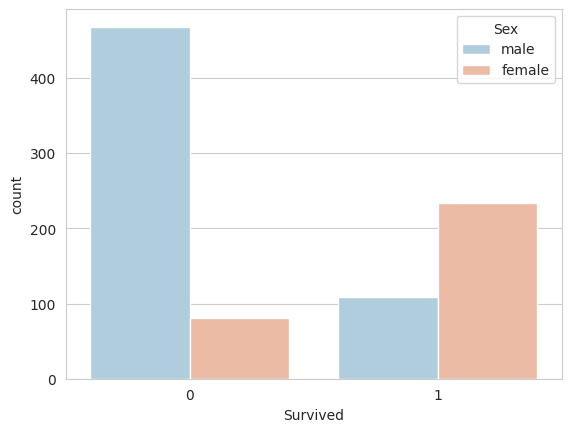

In [149]:
# Create a countplot to visualize the distribution of survival status (Survived) by gender (Sex)
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Sex', palette='RdBu_r')

This visualization suggests a gender disparity in survival aboard the Titanic, with women having a higher chance of survival than men.This is consistent with historical accounts that women and children were prioritized during the evacuation.

<Axes: xlabel='Survived', ylabel='count'>

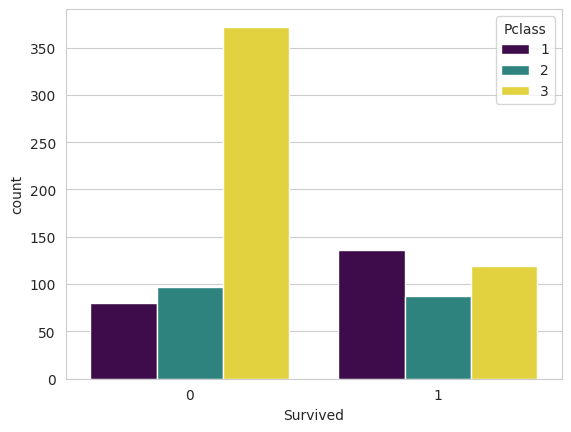

In [150]:
# Create a countplot to visualize the distribution of survival status (Survived) by passenger class (Pclass)
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Pclass', palette='viridis')

This visualization indicates that passengers in higher classes (1st class) had a higher chance of survival compared to those in lower classes (3rd class).

<Axes: xlabel='Age', ylabel='Count'>

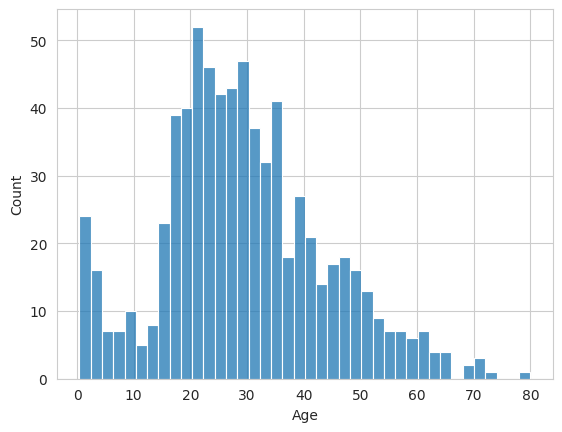

In [151]:
# Create a histogram to visualize the distribution of the 'Age' column
sns.histplot(df['Age'].dropna(), kde=False, bins=40)

The majority of passengers were young to middle-aged, with a peak in the age distribution likely around the 20-40 years range.

The distribution shows fewer elderly passengers and children, with the number of passengers decreasing as age increases.

Right-skewed distribution: In this case, most of the passengers are concentrated in the younger age range, with a peak around 20-40 years old. This type of distribution suggests that the mean age is likely higher than the median age, which is characteristic of right-skewed distributions.

In [152]:
print(f'mean of age: {df["Age"].mean()} , median of age: {df["Age"].median()}')

mean of age: 29.69911764705882 , median of age: 28.0


<Axes: xlabel='SibSp', ylabel='count'>

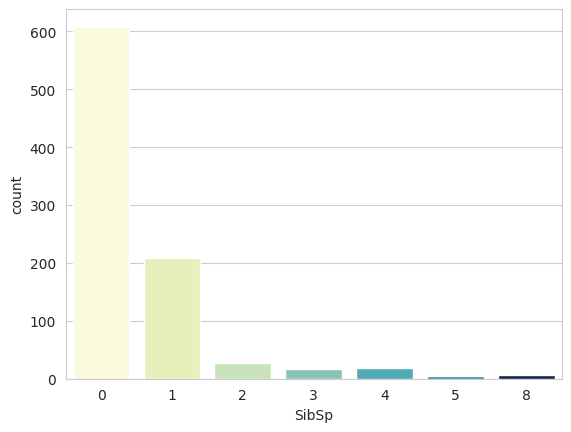

In [153]:
# Create a countplot to visualize the distribution of the number of siblings/spouses aboard (SibSp)
sns.countplot(x='SibSp',data=df,hue='SibSp',palette='YlGnBu',legend=False)

Most passengers had 0 siblings or spouses aboard (shown as the tallest bars), which suggests a large portion of passengers were traveling alone.
A smaller number of passengers had 1 or 2 siblings or spouses, with even fewer having higher numbers.

<Axes: xlabel='Fare', ylabel='Count'>

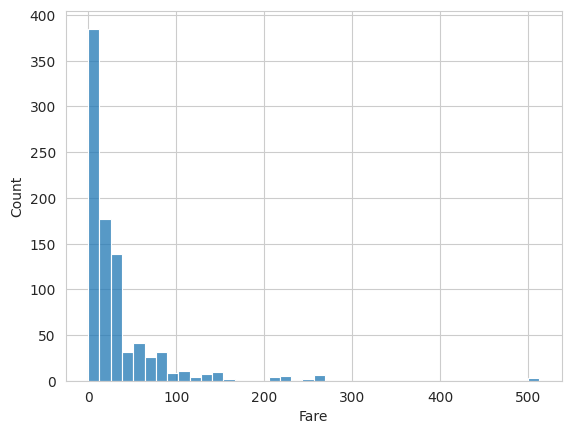

In [154]:
# Create a histogram to visualize the distribution of the 'Fare' column
sns.histplot(df['Fare'].dropna(), kde=False, bins=40)

1-The majority of passengers paid lower fares, with the highest count of passengers falling into the lower fare ranges.

2-There is a noticeable long tail to the right, indicating that a small number of passengers paid significantly higher fares, likely corresponding to first-class passengers.

3-The distribution is right-skewed, with most passengers paying lower fares, and a few passengers paying higher fares, which is common for data related to ticket prices where a small number of high-value transactions occur.

In [155]:
# Check unique values, minimum, and maximum of 'Fare'
print("Unique fares:", df['Fare'].nunique())  # Count unique values in the Fare column
print("Min fare:", df['Fare'].min())          # Minimum fare
print("Max fare:", df['Fare'].max())          # Maximum fare

Unique fares: 248
Min fare: 0.0
Max fare: 512.3292


# **Missing Values Handling**

In [156]:
# This will help us understand the context of the missing 'Age' values by showing the corresponding values for 'Pclass' and 'Sex'
# We select 'Pclass' (passenger class) and 'Sex' (gender) columns to examine if there are any patterns or correlations
print(df[df['Age'].isnull()][['Pclass', 'Sex']].head())

    Pclass     Sex
5        3    male
17       2    male
19       3  female
26       3    male
28       3  female


1-Concentration in Third Class: The majority of missing values for Age appear to be in third class, which could suggest that there might have been missing or incomplete data specifically for passengers in this class.

2-No Clear Gender Bias: The missing values are roughly evenly distributed between male and female, so there does not seem to be a gender-based bias in the missing data for the Age column.



*   **Impute Age Based on Passenger Class (Pclass):**  we could consider imputing the missing Age values using the **mean or median** age of different passenger classes.


<Axes: xlabel='Pclass', ylabel='Age'>

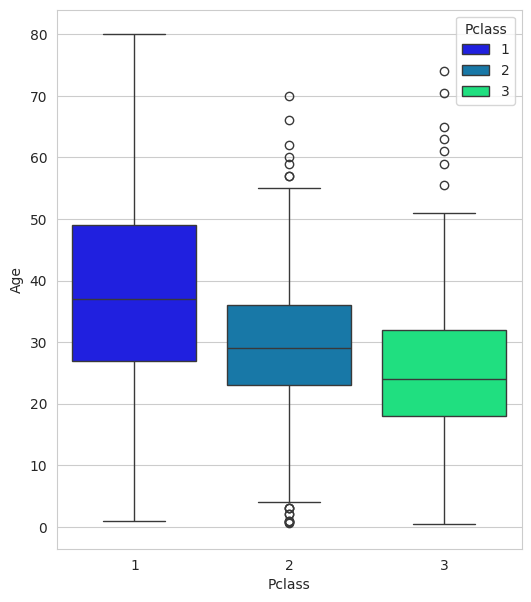

In [157]:
# Create a boxplot to visualize the distribution of 'Age' across different passenger classes ('Pclass')
plt.figure(figsize=(6,7))
sns.boxplot(x='Pclass', y='Age', data=df, hue='Pclass', palette='winter', dodge=False)

1-First-class passengers tend to be older on average, while third-class passengers are generally younger.

2-The plot also highlights outliers in second and third classes, showing that some very young or old passengers traveled in those classes.

In [158]:
# Check the median age for each class before imputation
median_by_class_before = df.groupby('Pclass')['Age'].median()
print(median_by_class_before)

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [159]:
# Impute missing 'Age' values with the median for each 'Pclass'
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

<Axes: >

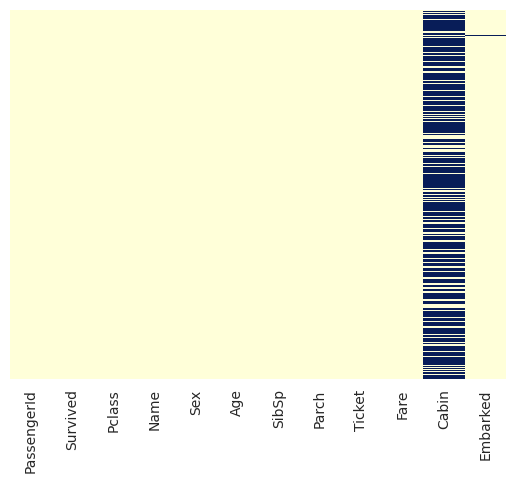

In [160]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='YlGnBu')

 Embarked columns has only a few missing values (2) . the later information said that the two missing values were actually S

In [161]:
# Drop rows where the 'Embarked' column has missing values
df['Embarked'] = df['Embarked'].fillna('S')

In [162]:
df['Embarked'].isnull().sum()

0

In [163]:
# Drop the 'Cabin' column from the DataFrame
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


The Cabin column in the Titanic dataset has a significant number of missing values. In many cases, dropping such columns is a common approach when a large portion of the data is missing and cannot be effectively imputed, or when the feature does not contribute meaningfully to the analysis.

<Axes: >

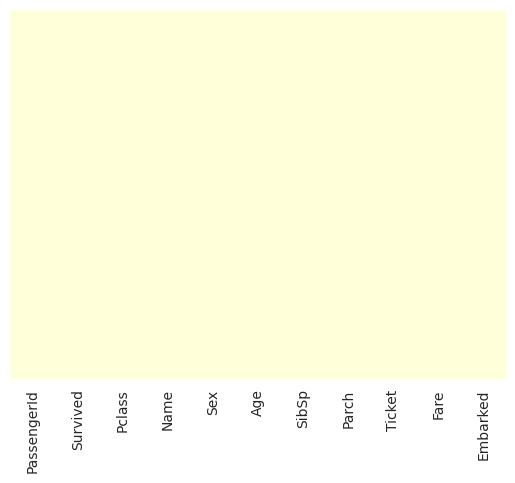

In [164]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='YlGnBu')

# **One-Hot Encoding**

In [165]:
# Perform one-hot encoding on 'Embarked' and 'Sex' columns
# pd.get_dummies creates new columns for each unique category in 'Embarked' and 'Sex'
# drop_first=True drops the first category of each column to avoid multicollinearity
df = pd.get_dummies(df, columns=['Embarked', 'Sex'], drop_first=True)

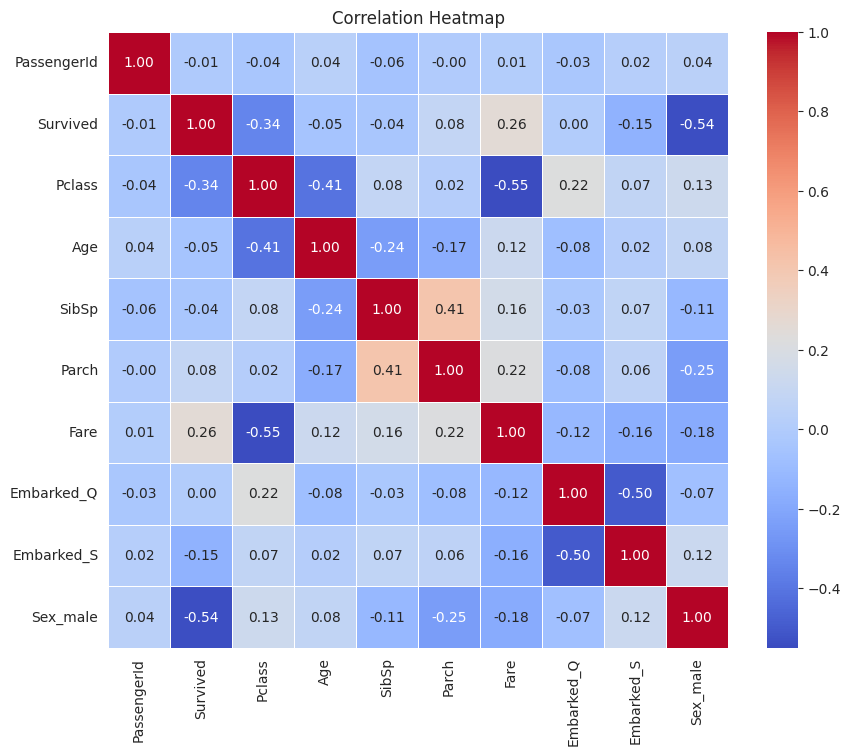

In [166]:
# Compute the correlation matrix
# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(['Name', 'Ticket'], axis=1)

# Compute the correlation matrix
corr = df_numeric.corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**The most important correlations with Survived in the Titanic dataset are**:

1-Sex_male: Medium negative correlation (-0.54) – being male is strongly associated with lower survival.

2-Fare: Weak positive correlation (0.26) – higher fare is associated with higher survival.

3-Pclass: weak negative correlation (-0.34) – lower class (Pclass 3) is associated with lower survival.

4-Age: Very Weak negative correlation (-0.05) – age has a slight negative impact on survival.

**Feature Engineering**

In [167]:
# Create a binary feature for whether the passenger is traveling alone
# A passenger is considered to be alone if they have no siblings/spouses (SibSp == 0) and no parents/children (Parch == 0)
df['IsAlone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)


df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Create dummy variables for the Title column
df = pd.get_dummies(df, columns=['Title'], drop_first=True)


bins = [0, 12, 18, 30, 50, 80]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# Create dummy variables for the AgeGroup column
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)


df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
# Create dummy variables for the FareGroup column
df = pd.get_dummies(df, columns=['FareGroup'], drop_first=True)


df.drop(['Name','Ticket'],axis=1,inplace=True)


df = df.apply(lambda x: x.astype(int) if x.dtype == bool else x)

Above code performs feature engineering on the Titanic dataset by creating new features and transforming categorical variables into numeric ones:

1. **IsAlone**: A binary feature indicating whether a passenger is traveling alone, based on having no siblings/spouses (SibSp == 0) and no parents/children (Parch == 0).


2. **Title**: Extracts the title (e.g., Mr., Mrs., Miss) from the passenger's name and creates dummy variables for each title.


3. **AgeGroup**: Categorizes passengers into age groups (Child, Teenager, Young Adult, Adult, Senior) based on age ranges, and creates dummy variables for each group.


4. **FareGroup**: Divides passengers into fare groups (Low, Medium-Low, Medium-High, High) based on quantiles of the Fare column, and creates dummy variables for each group.


5. **Cleanup**: Drops the Name and Ticket columns, as they are not needed for modeling.


6. **Data Type Conversion**: Converts boolean columns to integers for consistency.




In [168]:
# 'Survived' column will be used to check its correlation with other features in the dataset

df.corr()['Survived']

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.047255
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
Embarked_Q,0.003650
Embarked_S,-0.149683
Sex_male,-0.543351


# **Machine Learning Models**

After completing exploratory data analysis (EDA) on the Titanic dataset, I selected three machine learning models for classification: Logistic Regression, Decision Tree, and Random Forest. These models were chosen based on their ability to handle binary classification tasks.

The evaluation metric used was accuracy, which measures the proportion of correct predictions. Each model was trained on the preprocessed training data and evaluated on the test data. By comparing their accuracy scores, we could determine which model best predicts whether a passenger survived the Titanic disaster.



In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [170]:
#dividing the data into X and Y train and test groups

X = df.drop('Survived', axis=1)  # Features
y = df['Survived']              # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [171]:
X_train.shape,y_train.shape

((712, 33), (712,))

In [172]:
# Apply StandardScaler to scale numeric features

scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred1 = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8044692737430168


In [173]:
#Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred2=dt_model.predict(X_test)
accuracy_score(y_test, y_pred2)

0.7597765363128491

In [174]:
#Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred3=rf_model.predict(X_test)
accuracy_score(y_test, y_pred3)

0.8324022346368715

# **Conclusion:**

The Random Forest model outperformed both Linear Regression and Decision Tree in terms of accuracy, making it the best choice among the three for predicting Titanic survival. However, further model tuning, including parameter adjustments and feature engineering, could potentially improve the performance of all three models.

